Display the first few rows of the dataset using head().

In [ ]:
# R program to illustrate
# Predictive Analysis

# Import the data using read.csv()
myData = read.csv("/content/titanic.csv",
                stringsAsFactors = F)
head(myData,4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S


Use str() to check the structure of the dataset

In [ ]:
str(myData)

'data.frame':	891 obs. of  12 variables:
 $ PassengerId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : int  0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : int  3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : int  1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : int  0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num  7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...


Generate summary statistics using summary() to assess the distribution of numerical
variables (like Age, Fare) and the frequency of categorical variables (like Pclass, Sex,
Embarked)

In [ ]:
summary(myData)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

**Task 2 : Analyze Passenger Demographics**

Create visualizations to explore:

• The distribution of ages among passengers using a histogram or density plot.

• The gender distribution using a bar chart.

• The proportion of passengers in each passenger class (Pclass) using a bar chart.

# Distribution of ages

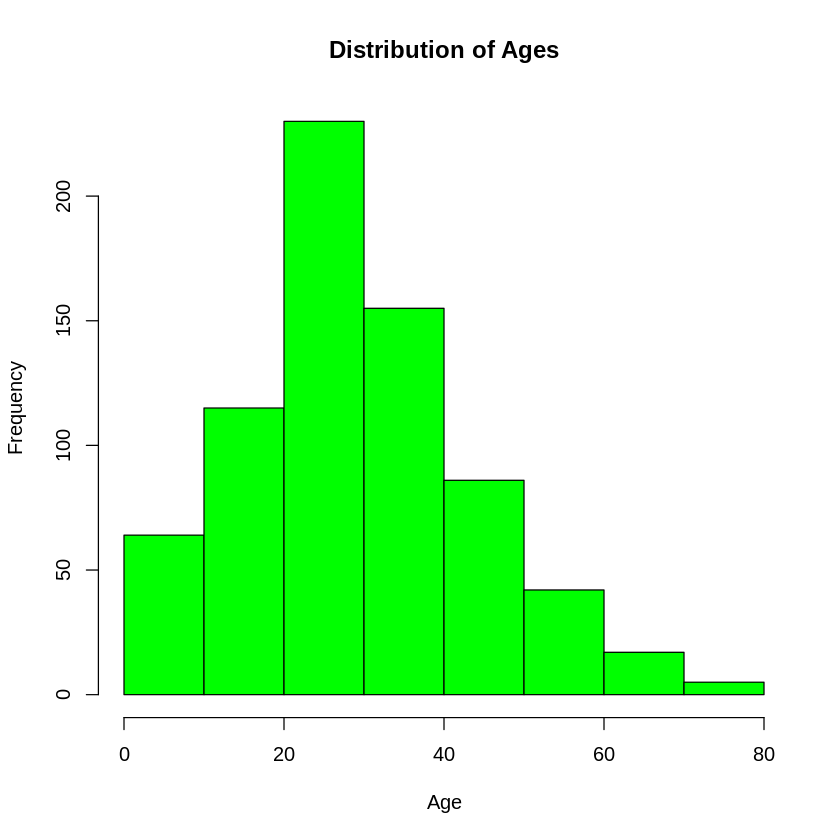

In [ ]:

hist(myData$Age, main = "Distribution of Ages", xlab = "Age",col = "green")


# Gender distribution

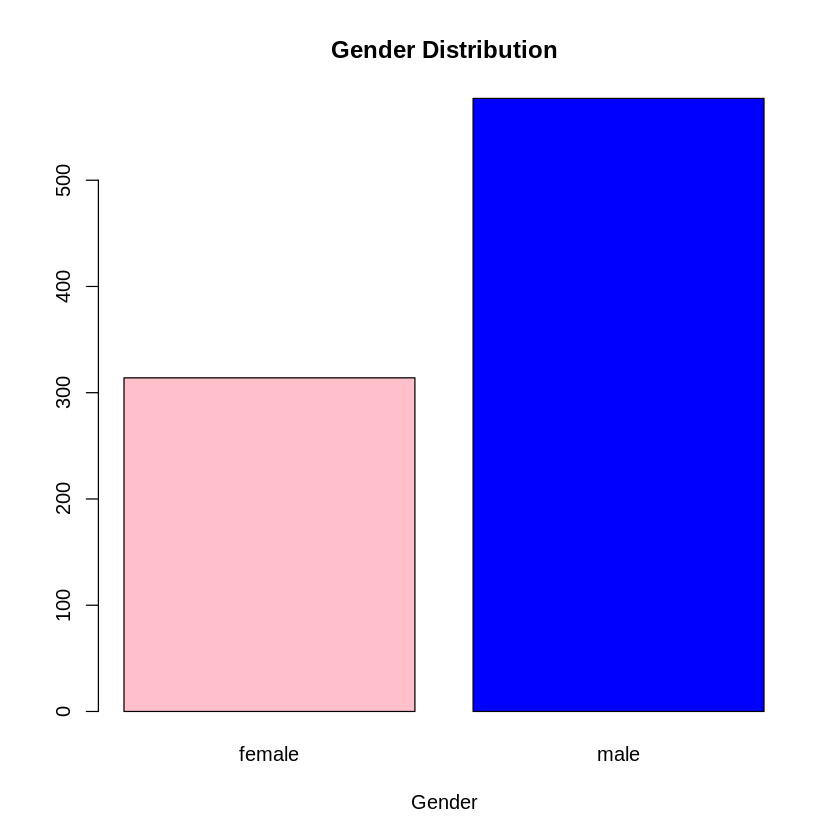

In [ ]:


barplot(table(myData$Sex), main = "Gender Distribution", xlab = "Gender",col = c("pink", "blue"))



# Proportion of passengers in each class

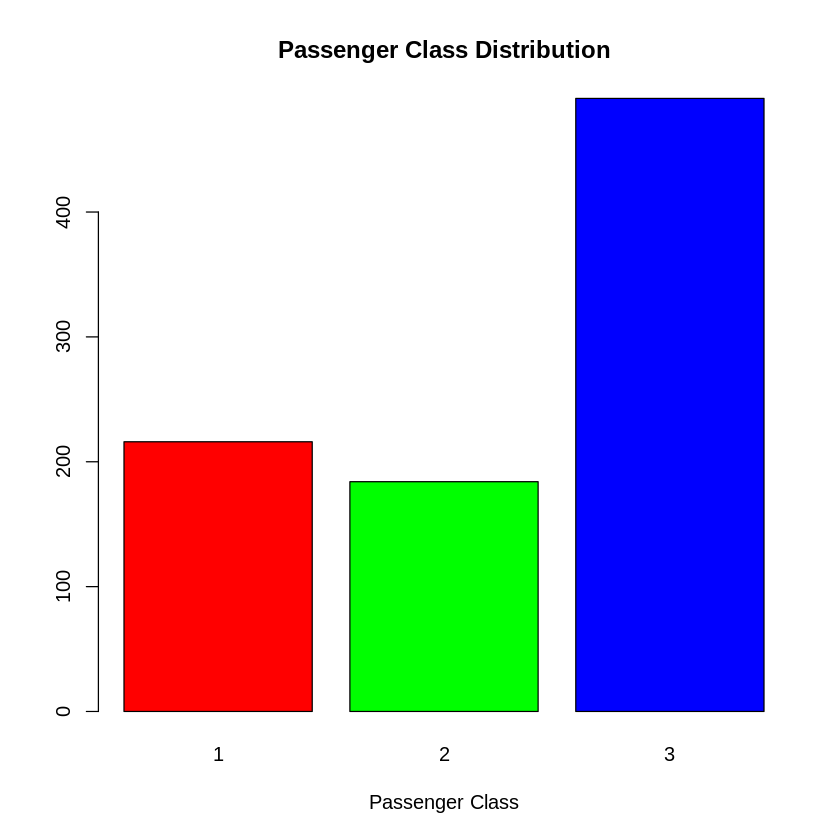

In [ ]:

barplot(table(myData$Pclass), main = "Passenger Class Distribution", xlab = "Passenger Class",col = c("red", "green", "blue"))

Age: The histogram of age  shows the distribution of passenger ages. In this graph, mostly age of the passengers were in between 20 to 40. This represent that passengers were mostly young adults,very less amount of adults and children were present on the Titanic.
Gender: The bar chart of gender would clearly show whether there were more male or female passengers on the Titanic.
Passenger Class: The bar chart of passenger class would indicate the proportion of passengers in each class (1st, 2nd, and 3rd). This might reveal if the majority of passengers were in the 3rd class. followed by 1st class, and has first class.

**Task 3: Survival Rate Analysis**

In [ ]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
survival_rate <- sum(myData$Survived) / nrow(myData)
print(paste("Overall survival rate:", survival_rate))

[1] "Overall survival rate: 0.383838383838384"


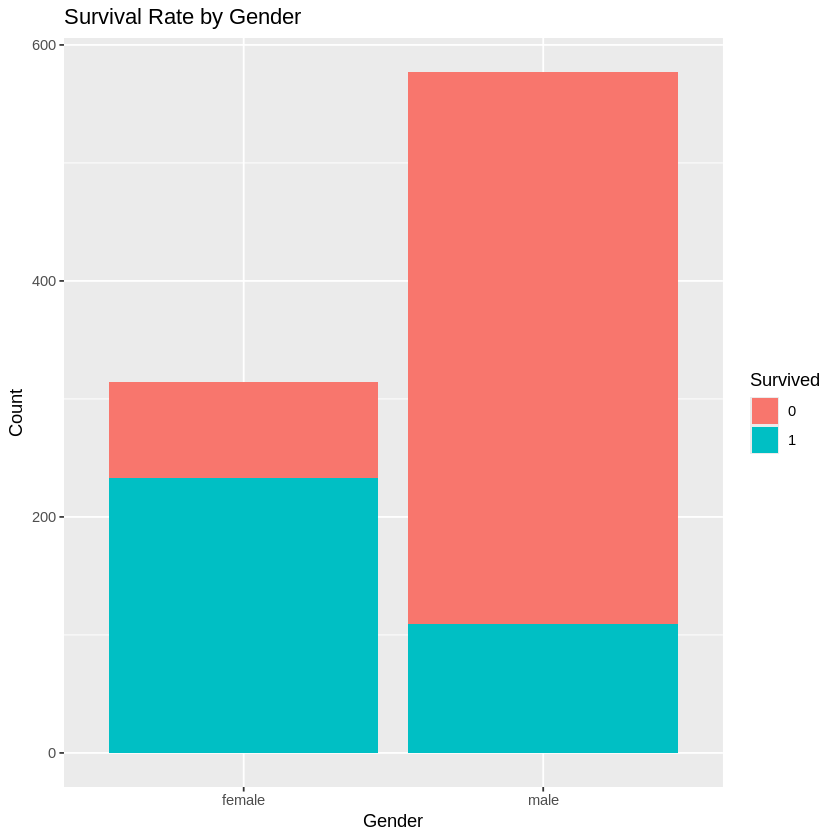

In [ ]:
ggplot(myData, aes(x = Sex, fill = factor(Survived))) +
  geom_bar(position = "stack") +
  labs(title = "Survival Rate by Gender", x = "Gender", y = "Count", fill = "Survived")

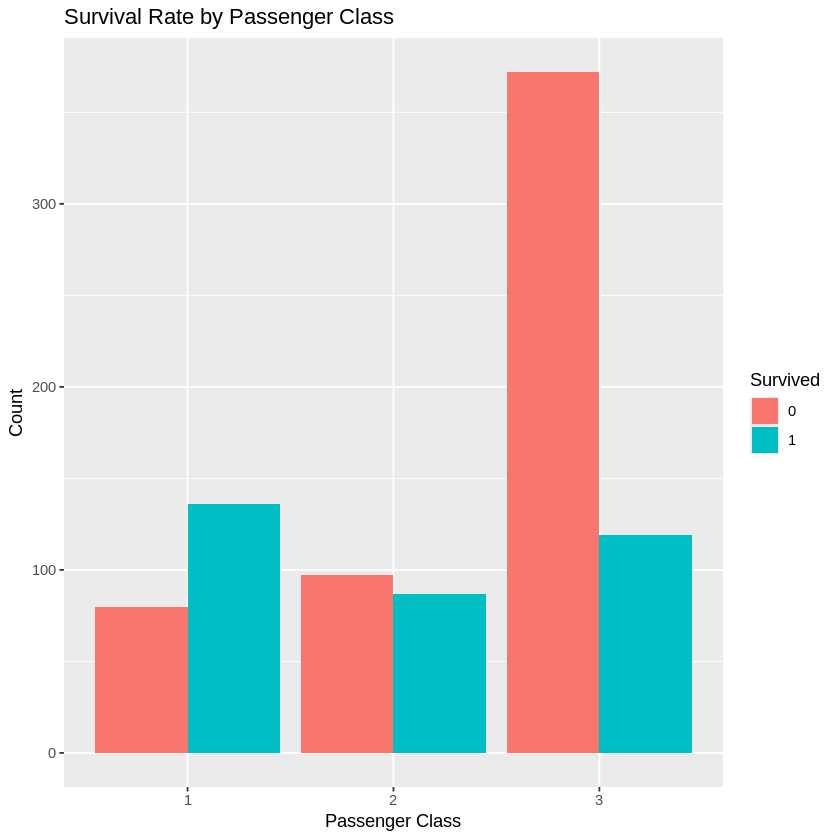

In [ ]:
ggplot(myData, aes(x = factor(Pclass), fill = factor(Survived))) +
  geom_bar(position = "dodge") +
  labs(title = "Survival Rate by Passenger Class", x = "Passenger Class", y = "Count", fill = "Survived")

Age group (you can categorize age into groups, e.g., children [0-12], adults [13-59],
seniors [60+])

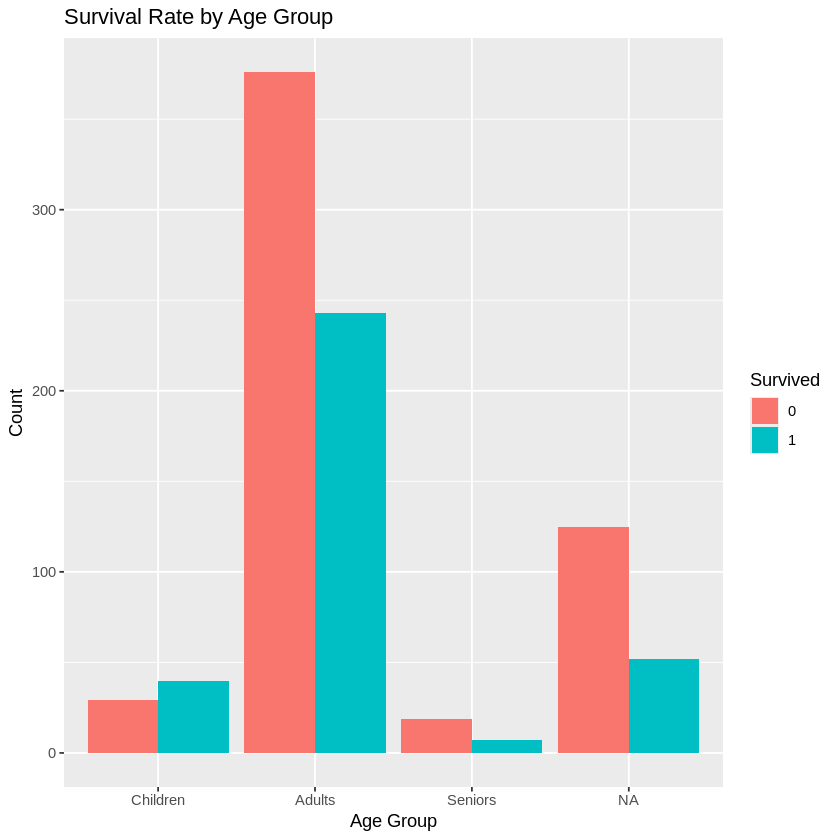

In [ ]:
# Create a new column for age group
myData$AgeGroup <- cut(myData$Age, breaks = c(0, 12, 59, Inf), labels = c("Children", "Adults", "Seniors"))

# Calculate survival rate for each age group
ggplot(myData, aes(x = AgeGroup, fill = factor(Survived))) +
  geom_bar(position = "dodge") +
  labs(title = "Survival Rate by Age Group", x = "Age Group", y = "Count", fill = "Survived")

Summary

#
    Gender: Male has a much higher survival rate than female.

 #  
  Passenger Class: Third-class passenger of the women has highest survival rate followed by second-class and then second-class passengers.


Age Group: This graph shows that mostly adults had present on  Titanic based on the survived rate. Adults of the passenger had the higher survived rate, followed by seniors and chlidren. Childern has higher survived rate than the children


#Task 4: Fare Analysis

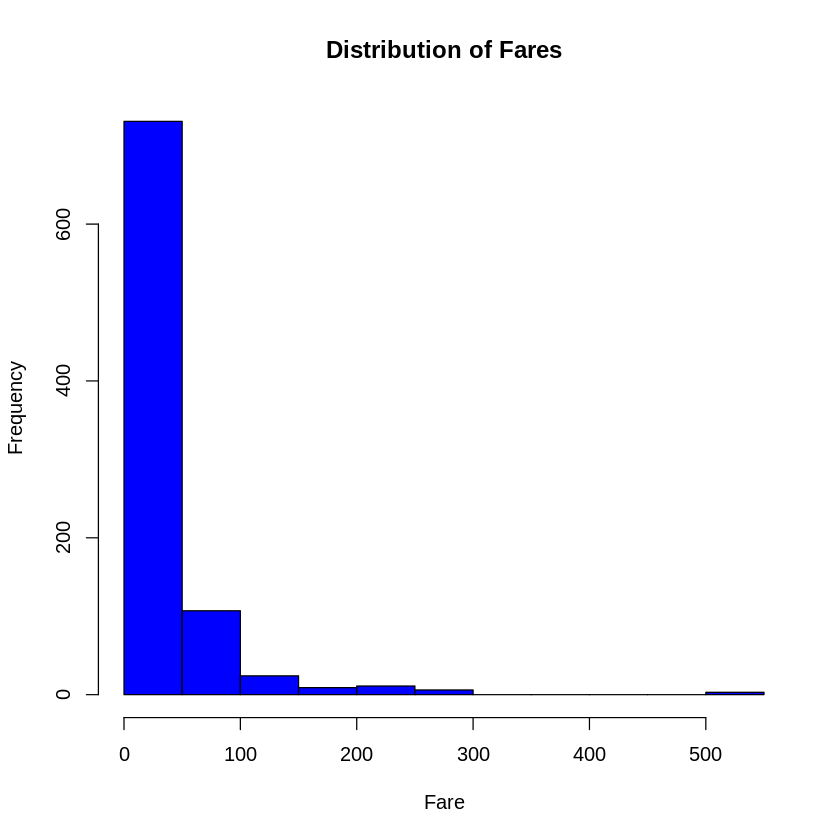

In [ ]:

hist(myData$Fare, main = "Distribution of Fares", xlab = "Fare", col = "blue")

This graph show the distribution of fare of each frequency. Frequency distribution of fair lie in between 0 to 100

In [ ]:

fare_summary <- aggregate(Fare ~ Survived, data = myData, FUN = summary)
print(fare_summary)


  Survived Fare.Min. Fare.1st Qu. Fare.Median Fare.Mean Fare.3rd Qu. Fare.Max.
1        0   0.00000      7.85420    10.50000  22.11789     26.00000 263.00000
2        1   0.00000     12.47500    26.00000  48.39541     57.00000 512.32920


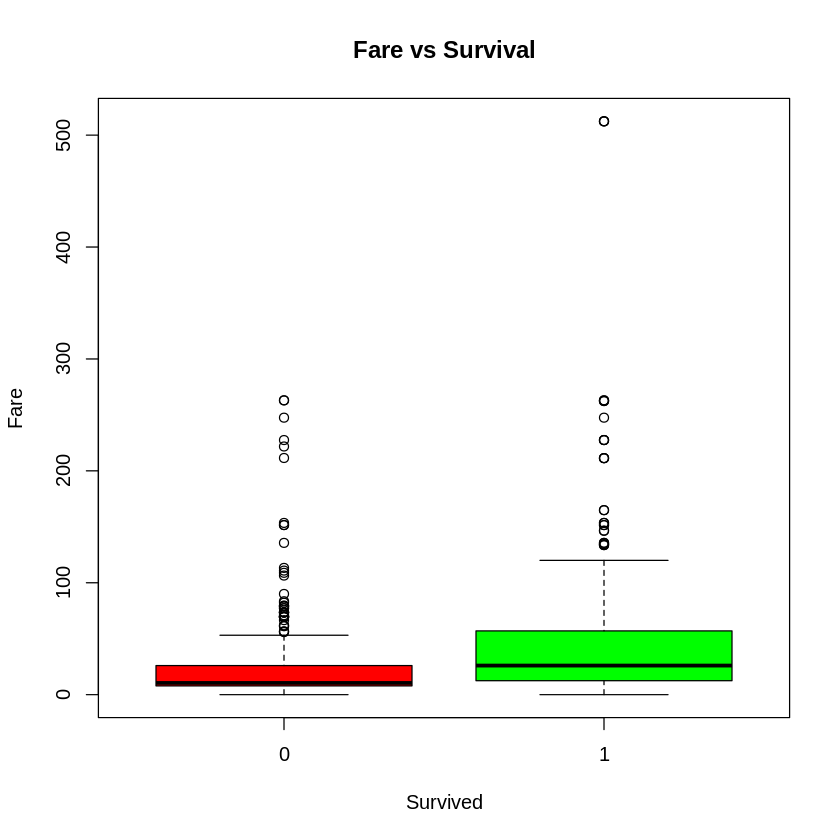

In [ ]:

boxplot(Fare ~ Survived, data = myData, main = "Fare vs Survival",
        xlab = "Survived", ylab = "Fare", col = c("red", "green"))


This graph show that mostly passengers of the survived has higher fare then the unsurvived of the passenger. So, this show that survived passenger has ability to pay the higher fare then unsurvived of the passenger

Task 5: Family Size and Its Impact on Survival

In [ ]:

myData$FamilySize <- myData$SibSp + myData$Parch

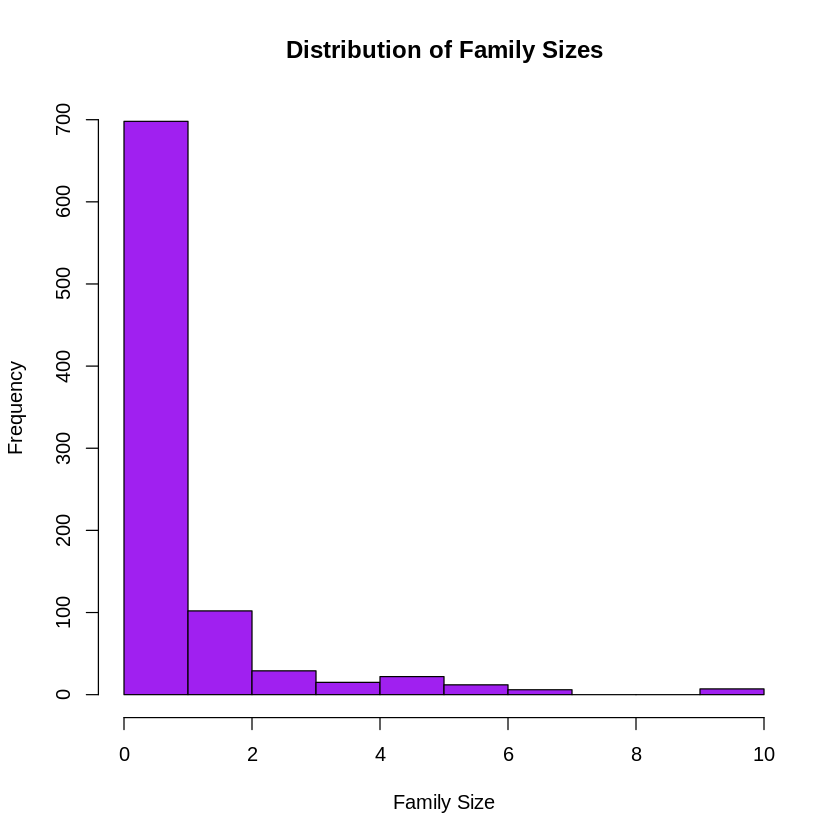

In [ ]:
hist(myData$FamilySize, main = "Distribution of Family Sizes", xlab = "Family Size", col = "purple")

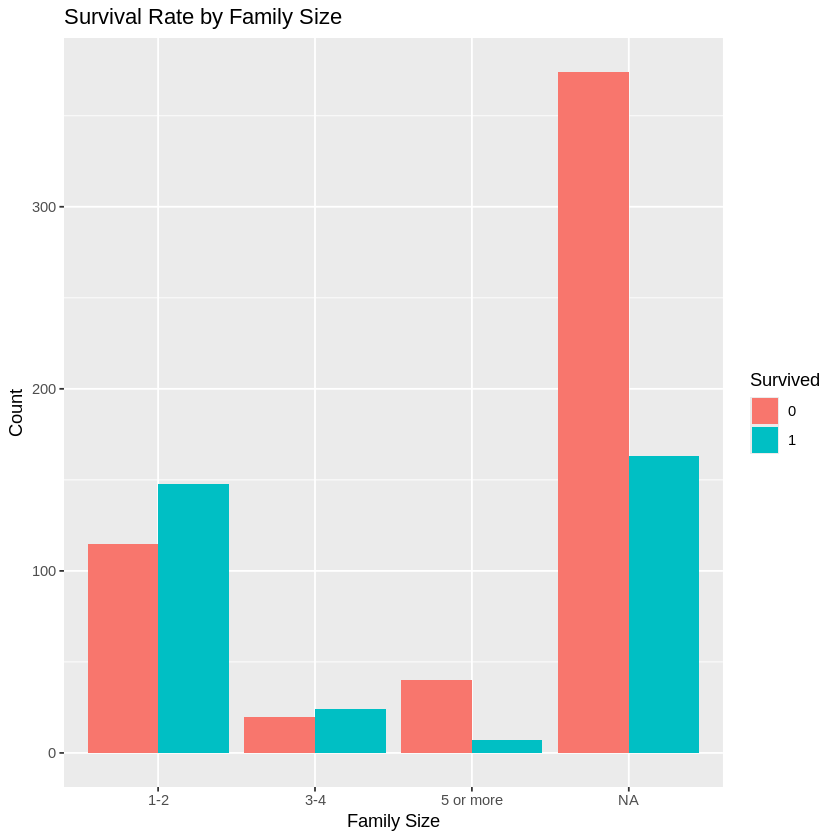

In [ ]:
# Survival rates based on family size
myData$FamilySizeGroup <- cut(myData$FamilySize, breaks = c(0, 2, 4, Inf), labels = c("1-2", "3-4", "5 or more"))
ggplot(myData, aes(x = FamilySizeGroup, fill = factor(Survived))) +
  geom_bar(position = "dodge") +
  labs(title = "Survival Rate by Family Size", x = "Family Size", y = "Count", fill = "Survived")

In [ ]:

print(table(myData$FamilySizeGroup, myData$Survived))

           
              0   1
  1-2       115 148
  3-4        20  24
  5 or more  40   7


Summarize the findings regarding whether having a larger family size impacted survival
chances.

# Predictive analysis:

Task 1: Data Preprocessing

Objective: Prepare the data for predictive modeling by cleaning and transforming it

# Identify columns with missing values

In [ ]:
colSums(is.na(myData))

PassengerId        Survived          Pclass            Name             Sex 
              0               0               0               0               0 
            Age           SibSp           Parch          Ticket            Fare 
            177               0               0               0               0 
          Cabin        Embarked        AgeGroup      FamilySize FamilySizeGroup 
              0               0             177               0             537

# Impute missing ages with the median age

In [ ]:
myData$Age[is.na(myData$Age)] <- median(myData$Age, na.rm = TRUE)

In [ ]:

myData$Embarked[myData$Embarked == ""] <- names(sort(-table(myData$Embarked)))[1]

# Convert categorical variables into factors

In [ ]:
myData$Pclass <- as.factor(myData$Pclass)
myData$Sex <- as.factor(myData$Sex)
myData$Embarked <- as.factor(myData$Embarked)

Task 2: Exploratory Data Analysis (EDA)

# Relationship between Pclass and Survived

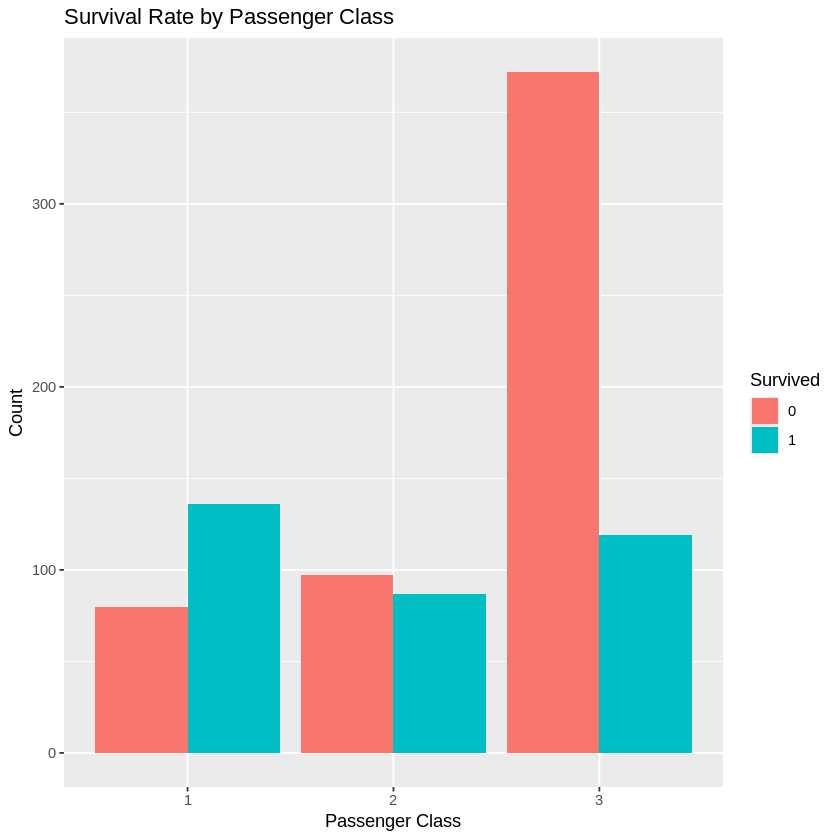

In [ ]:

ggplot(myData, aes(x = Pclass, fill = factor(Survived))) +
  geom_bar(position = "dodge") +
  labs(title = "Survival Rate by Passenger Class", x = "Passenger Class", y = "Count", fill = "Survived")


# Relationship between Sex and Survived

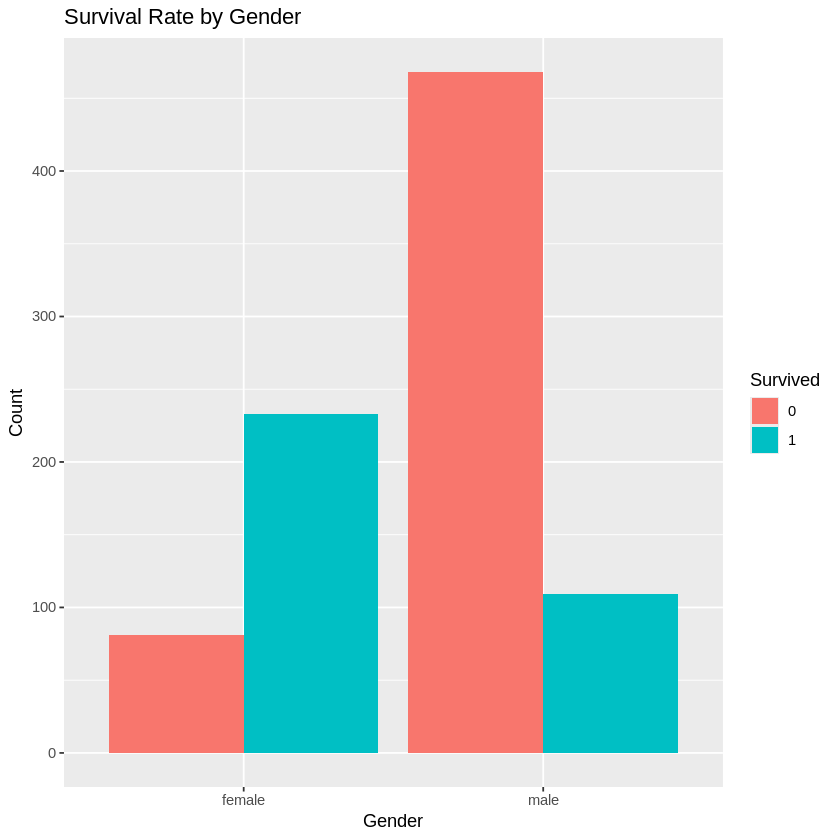

In [ ]:


ggplot(myData, aes(x = Sex, fill = factor(Survived))) +
  geom_bar(position = "dodge") +
  labs(title = "Survival Rate by Gender", x = "Gender", y = "Count", fill = "Survived")

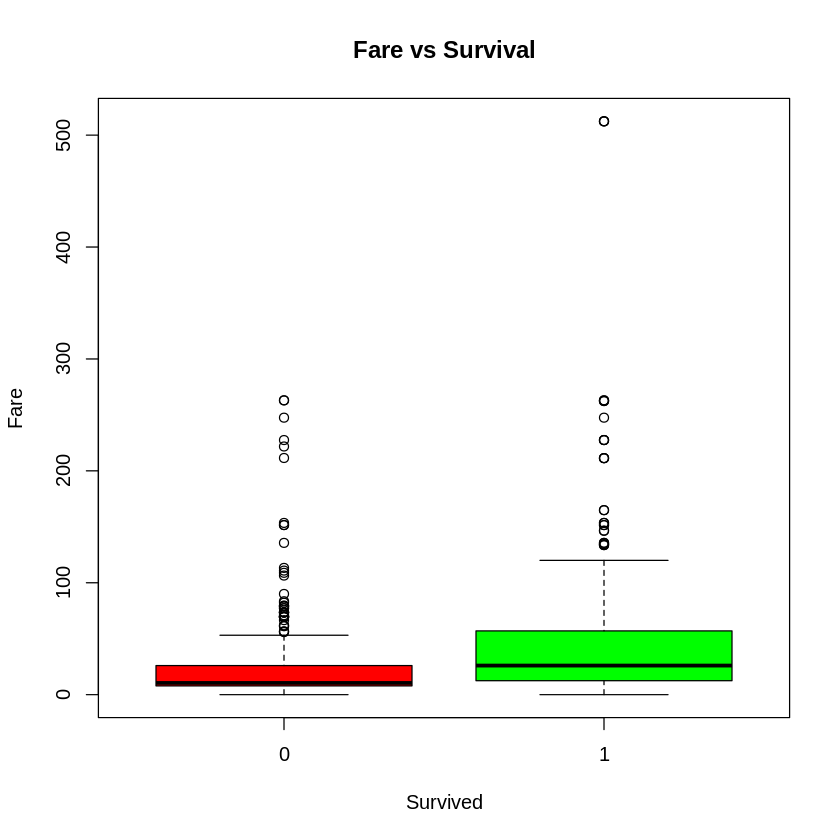

In [ ]:
# Relationship between Fare and Survived
boxplot(Fare ~ Survived, data = myData, main = "Fare vs Survival",
        xlab = "Survived", ylab = "Fare", col = c("red", "green"))

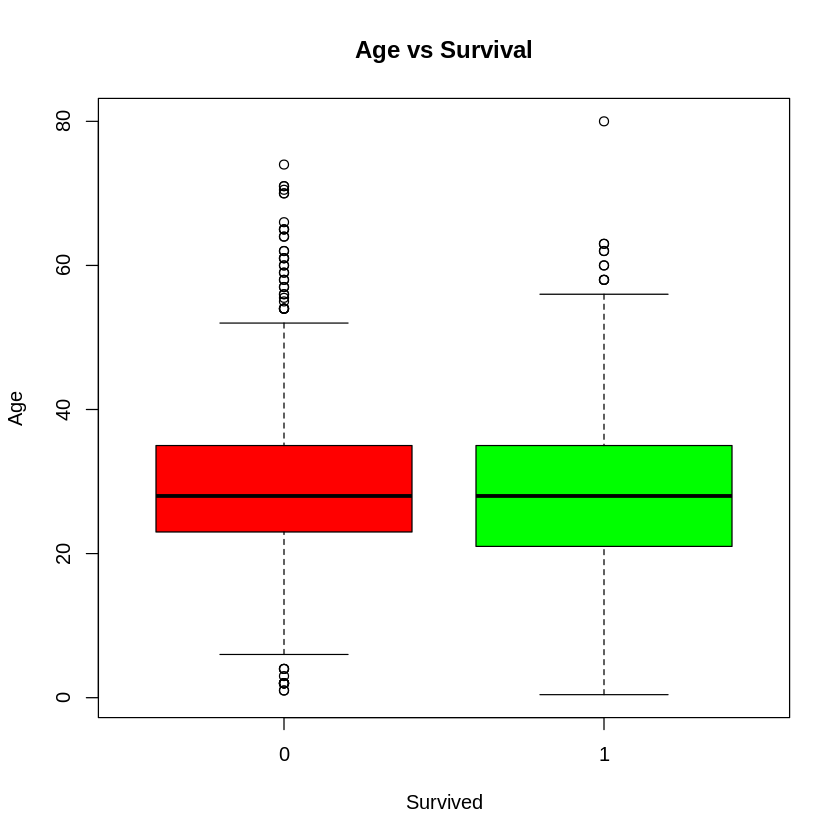

In [ ]:

# Relationship between Age and Survived
boxplot(Age ~ Survived, data = myData, main = "Age vs Survival",
        xlab = "Survived", ylab = "Age", col = c("red", "green"))

Task 3: Model Training

In [ ]:
install.packages("caTools", version = "1.18.2")
library(caTools)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’




In [ ]:
set.seed(123)
split <- sample.split(myData$Survived, SplitRatio = 0.7)
train_data <- subset(myData, split == TRUE)
test_data <- subset(myData, split == FALSE)

In [ ]:
model <- glm(Survived ~ Pclass + Sex + Age + Fare + FamilySize, data = train_data, family = binomial)
summary(model)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + Fare + FamilySize, 
    family = binomial, data = train_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.691082   0.534489   6.906 4.99e-12 ***
Pclass2     -0.927683   0.346893  -2.674 0.007489 ** 
Pclass3     -2.061610   0.348812  -5.910 3.41e-09 ***
Sexmale     -2.842108   0.234921 -12.098  < 2e-16 ***
Age         -0.034427   0.009705  -3.547 0.000389 ***
Fare         0.001353   0.002811   0.481 0.630379    
FamilySize  -0.244788   0.077100  -3.175 0.001499 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 829.60  on 622  degrees of freedom
Residual deviance: 550.51  on 616  degrees of freedom
AIC: 564.51

Number of Fisher Scoring iterations: 5


Task 4: Model Evaluation

In [ ]:
# Make predictions on the testing set
predictions <- predict(model, newdata = test_data, type = "response")
predicted_classes <- ifelse(predictions > 0.5, 1, 0)

# Create a confusion matrix
confusion_matrix <- table(test_data$Survived, predicted_classes)
print(confusion_matrix)

# Calculate evaluation metrics
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
precision <- confusion_matrix[2, 2] / sum(confusion_matrix[, 2])
recall <- confusion_matrix[2, 2] / sum(confusion_matrix[2, ])
f1_score <- 2 * precision * recall / (precision + recall)

# Print the evaluation metrics
print(paste("Accuracy:", accuracy))
print(paste("Precision:", precision))
print(paste("Recall:", recall))
print(paste("F1-score:", f1_score))

   predicted_classes
      0   1
  0 145  20
  1  36  67
[1] "Accuracy: 0.791044776119403"
[1] "Precision: 0.770114942528736"
[1] "Recall: 0.650485436893204"
[1] "F1-score: 0.705263157894737"
